# Leitura e visualização da imagem

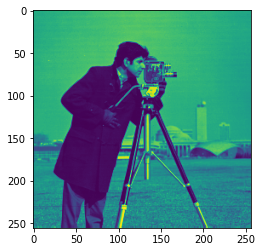

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('cameraman.tiff')
# Mostra a imagem. 
# Por padrão, o matplotlib faz um mapeamento dos valores 0 a 255 na imagem para 
# as cores do mapa de cores viridis (https://matplotlib.org/examples/color/colormaps_reference.html)
plt.imshow(img)

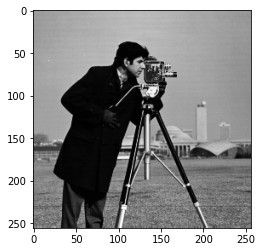

In [37]:
# Mostra a imagem utilizando mapa de cores nível de cinza
plt.imshow(img, cmap='gray')

In [38]:
# Imprime a primeira linha da imagem
print(img[0])

[156 159 158 155 158 156 159 158 157 158 158 159 160 160 160 158 163 161
 162 160 164 160 165 163 161 163 161 164 165 162 161 165 165 164 166 165
 164 166 167 165 165 164 170 166 167 167 170 168 169 166 169 167 170 169
 169 171 169 171 169 171 170 169 173 173 172 171 173 176 174 176 180 179
 178 178 181 181 181 177 180 178 179 180 180 180 178 184 181 182 183 182
 183 181 182 183 182 185 184 181 181 183 184 183 184 183 186 186 187 184
 183 185 185 185 182 183 186 182 184 187 185 188 185 185 186 184 184 182
 186 186 185 181 186 182 182 185 183 180 181 182 181 185 182 186 182 181
 183 182 181 181 181 179 181 177 180 181 178 178 180 179 180 177 179 180
 178 176 178 174 177 178 173 177 177 176 172 172 172 176 174 177 173 173
 169 172 169 171 167 167 166 167 168 168 168 168 169 166 169 165 166 166
 166 164 166 169 166 168 166 165 168 167 168 165 166 166 164 163 164 159
 164 164 158 162 162 162 161 159 161 161 159 159 160 155 155 154 155 153
 156 155 158 156 155 155 156 154 151 156 155 152 15

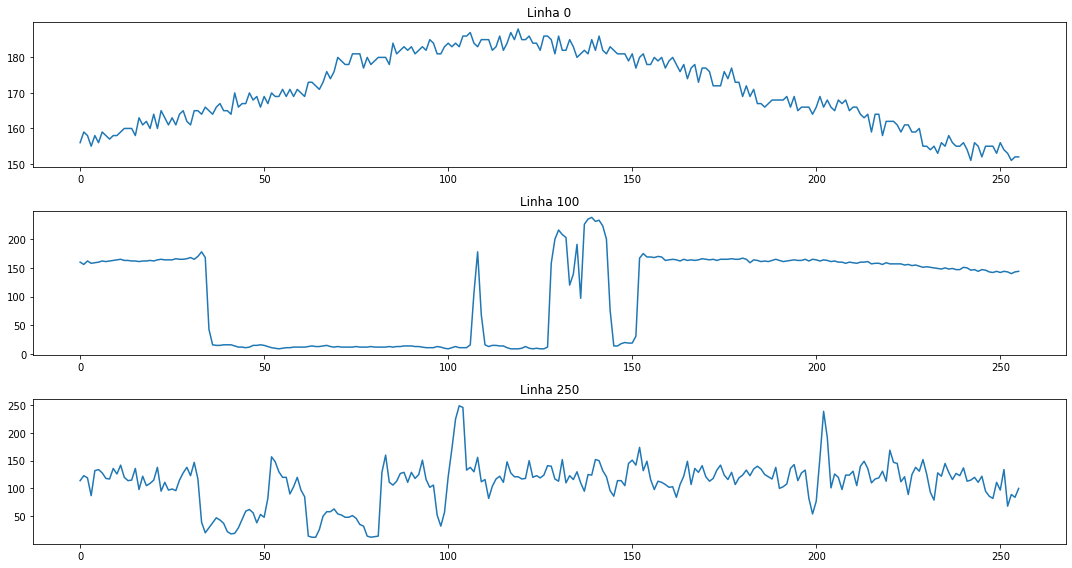

In [39]:
# Plota os valores de três linhas diferentes da imagem
plt.figure(figsize=[15, 8])
plt.subplot(3, 1, 1)
plt.plot(img[0])
plt.title('Linha 0')
plt.subplot(3, 1, 2)
plt.plot(img[100])
plt.title('Linha 100')
plt.subplot(3, 1, 3)
plt.plot(img[250])
plt.title('Linha 250')
plt.tight_layout()

# Transformações de imagens

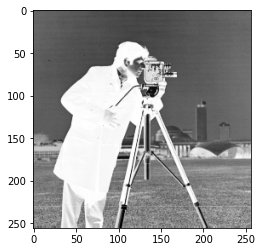

In [40]:
# Negativo, utilizando loops Python
num_linhas, num_cols = img.shape
img_neg = np.zeros((num_linhas, num_cols), dtype=np.uint8)
for row in range(num_linhas):
    for col in range(num_cols):
        img_neg[row, col] = 255 - img[row, col]
plt.imshow(img_neg, 'gray')

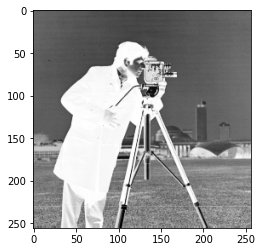

In [41]:
# Negativo, utilizando o maravilhoso numpy
img_neg_np = 255 - img
plt.imshow(img_neg_np, 'gray')

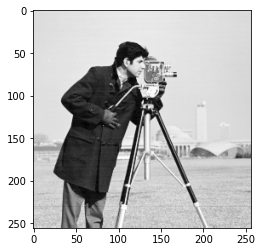

In [42]:
# Logaritmo
img_log = np.zeros((num_linhas, num_cols), dtype=np.float64)
for row in range(num_linhas):
    for col in range(num_cols):
        img_log[row, col] = np.log(1+img[row, col])
plt.imshow(img_log, 'gray')

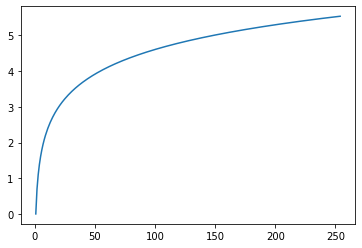

In [43]:
# Visualização da função logaritmo
x = range(1, 255)
y = np.log(x)
plt.plot(x, y)

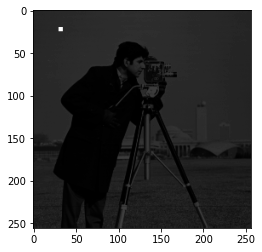

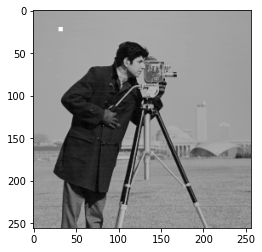

In [44]:
# Simulando uma situação na qual o logaritmo seria util
img_sim = img.astype(float)
img_sim[20:25, 30:35] = 1000
plt.imshow(img_sim, 'gray')
img_sim_log = np.log(img_sim)
plt.figure()
plt.imshow(img_sim_log, 'gray')

In [45]:
# Implementação de uma lookup table logarítmica
lookupTable = np.zeros(256)
for value in range(0, 256):
    lookupTable[value] = np.log(1+value)
print(lookupTable)

[0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458 2.30258509 2.39789527 2.48490665
 2.56494936 2.63905733 2.7080502  2.77258872 2.83321334 2.89037176
 2.94443898 2.99573227 3.04452244 3.09104245 3.13549422 3.17805383
 3.21887582 3.25809654 3.29583687 3.33220451 3.36729583 3.40119738
 3.4339872  3.4657359  3.49650756 3.52636052 3.55534806 3.58351894
 3.61091791 3.63758616 3.66356165 3.68887945 3.71357207 3.73766962
 3.76120012 3.78418963 3.80666249 3.8286414  3.8501476  3.87120101
 3.8918203  3.91202301 3.93182563 3.95124372 3.97029191 3.98898405
 4.00733319 4.02535169 4.04305127 4.06044301 4.07753744 4.09434456
 4.11087386 4.12713439 4.14313473 4.15888308 4.17438727 4.18965474
 4.20469262 4.21950771 4.2341065  4.24849524 4.26267988 4.27666612
 4.29045944 4.30406509 4.31748811 4.33073334 4.34380542 4.35670883
 4.36944785 4.38202663 4.39444915 4.40671925 4.41884061 4.4308168
 4.44265126 4.4543473  4.46590812 4.47733681 4.48863637 4.49980

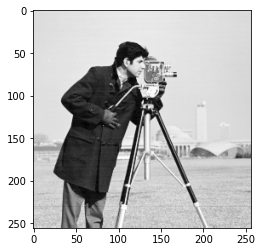

In [46]:
# Transformação de imagem utilizando lookup table
img_log = np.zeros((num_linhas, num_cols), dtype=np.float64)
for row in range(num_linhas):
    for col in range(num_cols):
        img_log[row, col] = lookupTable[img[row, col]]
plt.imshow(img_log, 'gray')

In [47]:
print( img.shape )

(256, 256)
